# Assignment-16

# Neural Networking (Gas_turbine)

In [1]:
#Import Libraries
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA

In [5]:
df=df.iloc[:,[7,0,1,2]]
df.shape

(15039, 4)

In [6]:
df.dtypes

TEY    float64
AT     float64
AP     float64
AH     float64
dtype: object

In [7]:
df.describe()

,TEY,AT,AP,AH
count,15039.000000,15039.000000,15039.00000,15039.000000
mean,134.188464,17.764381,1013.19924,79.124174
std,15.829717,7.574323,6.41076,13.793439
min,100.170000,0.522300,985.85000,30.344000
25%,127.985000,11.408000,1008.90000,69.750000
50%,133.780000,18.186000,1012.80000,82.266000
75%,140.895000,23.862500,1016.90000,90.043500
max,174.610000,34.929000,1034.20000,100.200000


In [8]:
df.isnull().sum()

TEY    0
AT     0
AP     0
AH     0
dtype: int64

In [9]:
x=df.iloc[:,1:5]
y=df.iloc[:,0]

In [10]:
x

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150
...,...,...,...
15034,9.0301,1005.6,98.460
15035,7.8879,1005.9,99.093
15036,7.2647,1006.3,99.496
15037,7.0060,1006.8,99.008


In [11]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [12]:
df.corr()['TEY'].sort_values(ascending=False)

TEY    1.000000
AP     0.146939
AH    -0.110272
AT    -0.207495
Name: TEY, dtype: float64

# Data Visualization

In [13]:
numerical_features = df.describe(include=["int64","float64"]).columns
numerical_features

Index(['TEY', 'AT', 'AP', 'AH'], dtype='object')

Univariate plots

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
sns.set_style('darkgrid')


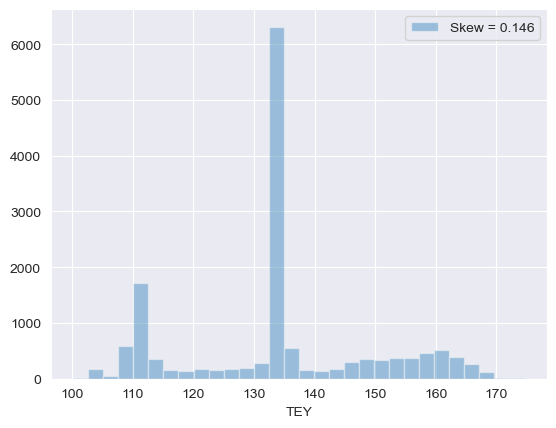

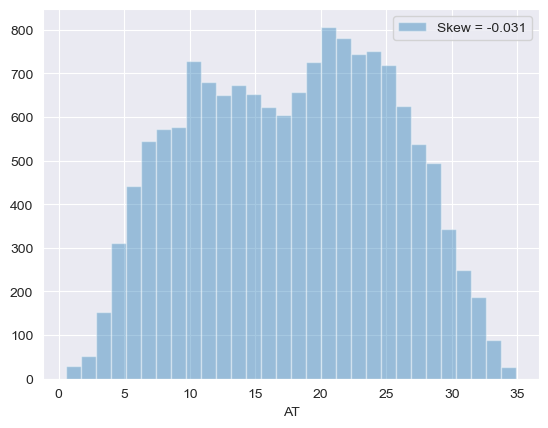

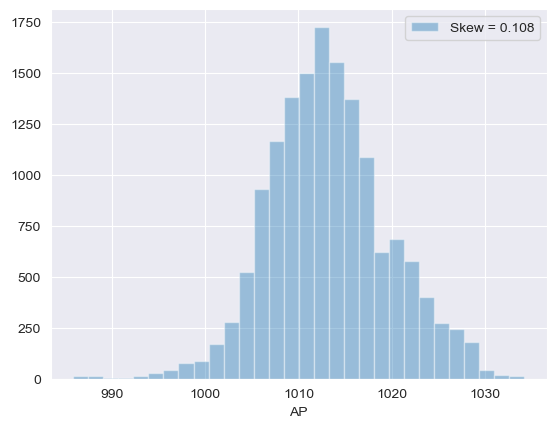

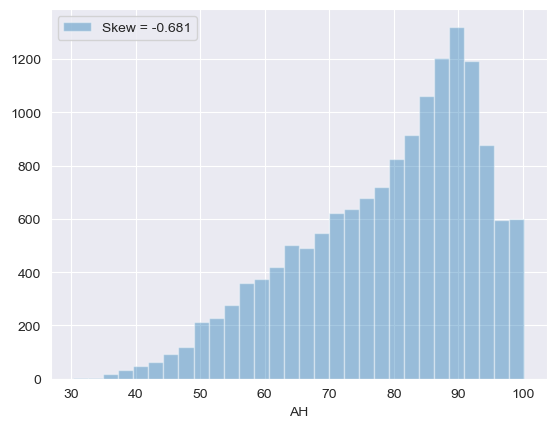

In [15]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']

for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [16]:
# Detect observations with more than one outlier by Turkey's method:

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
# Iterate over features(columns):

    for col in df.columns.tolist():
        
        # 1st quartile (25%):
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%):
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR):
        IQR = Q3 - Q1
        
        # Outlier step:
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature columns:
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # Append the found outlier indices for col to the list of outlier indices:
        
        outlier_indices.extend(outlier_list_col)
        
    # Select observations containing more than 2 outliers:
    
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features])))) 

The dataset contains 0 observations with more than 2 outliers


In [17]:
numerical_features

['TEY', 'AT', 'AP', 'AH']

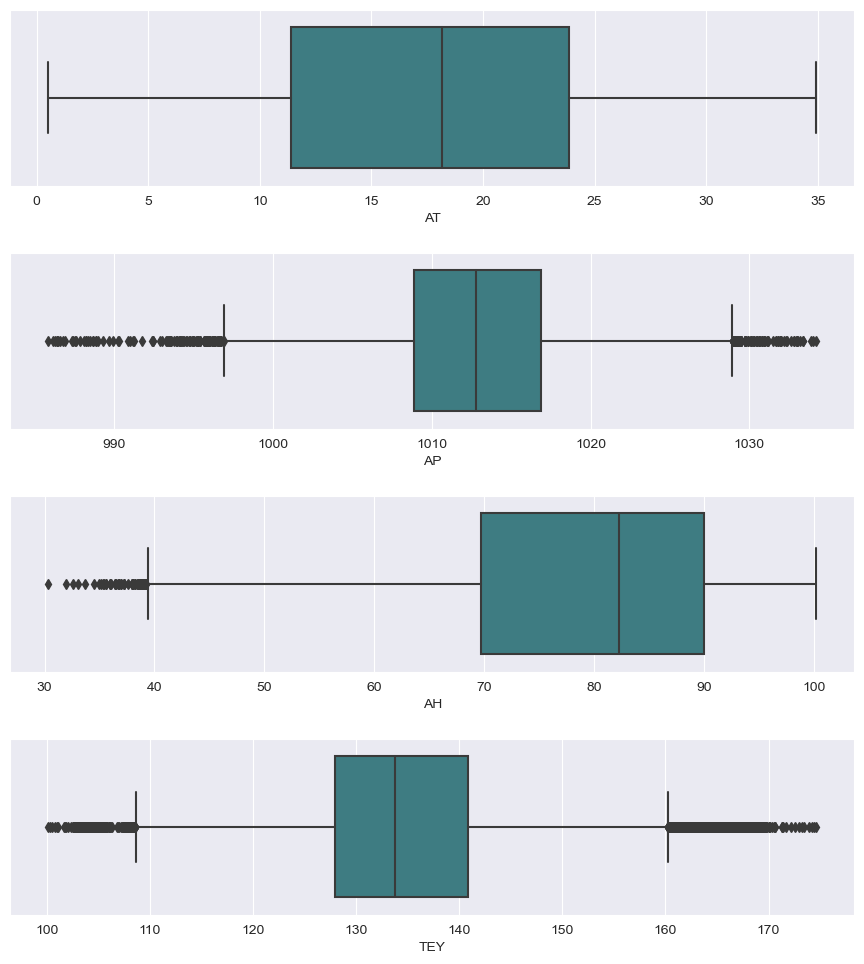

In [18]:
outliers=df.copy() 
fig, axes=plt.subplots(4,1,figsize=(9,10),sharex=False,sharey=False)
sns.boxplot(x='AT',data=outliers,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=outliers,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=outliers,palette='crest',ax=axes[2])
sns.boxplot(x='TEY',data=outliers,palette='crest',ax=axes[3])

plt.tight_layout(pad=2.0)
plt.show()

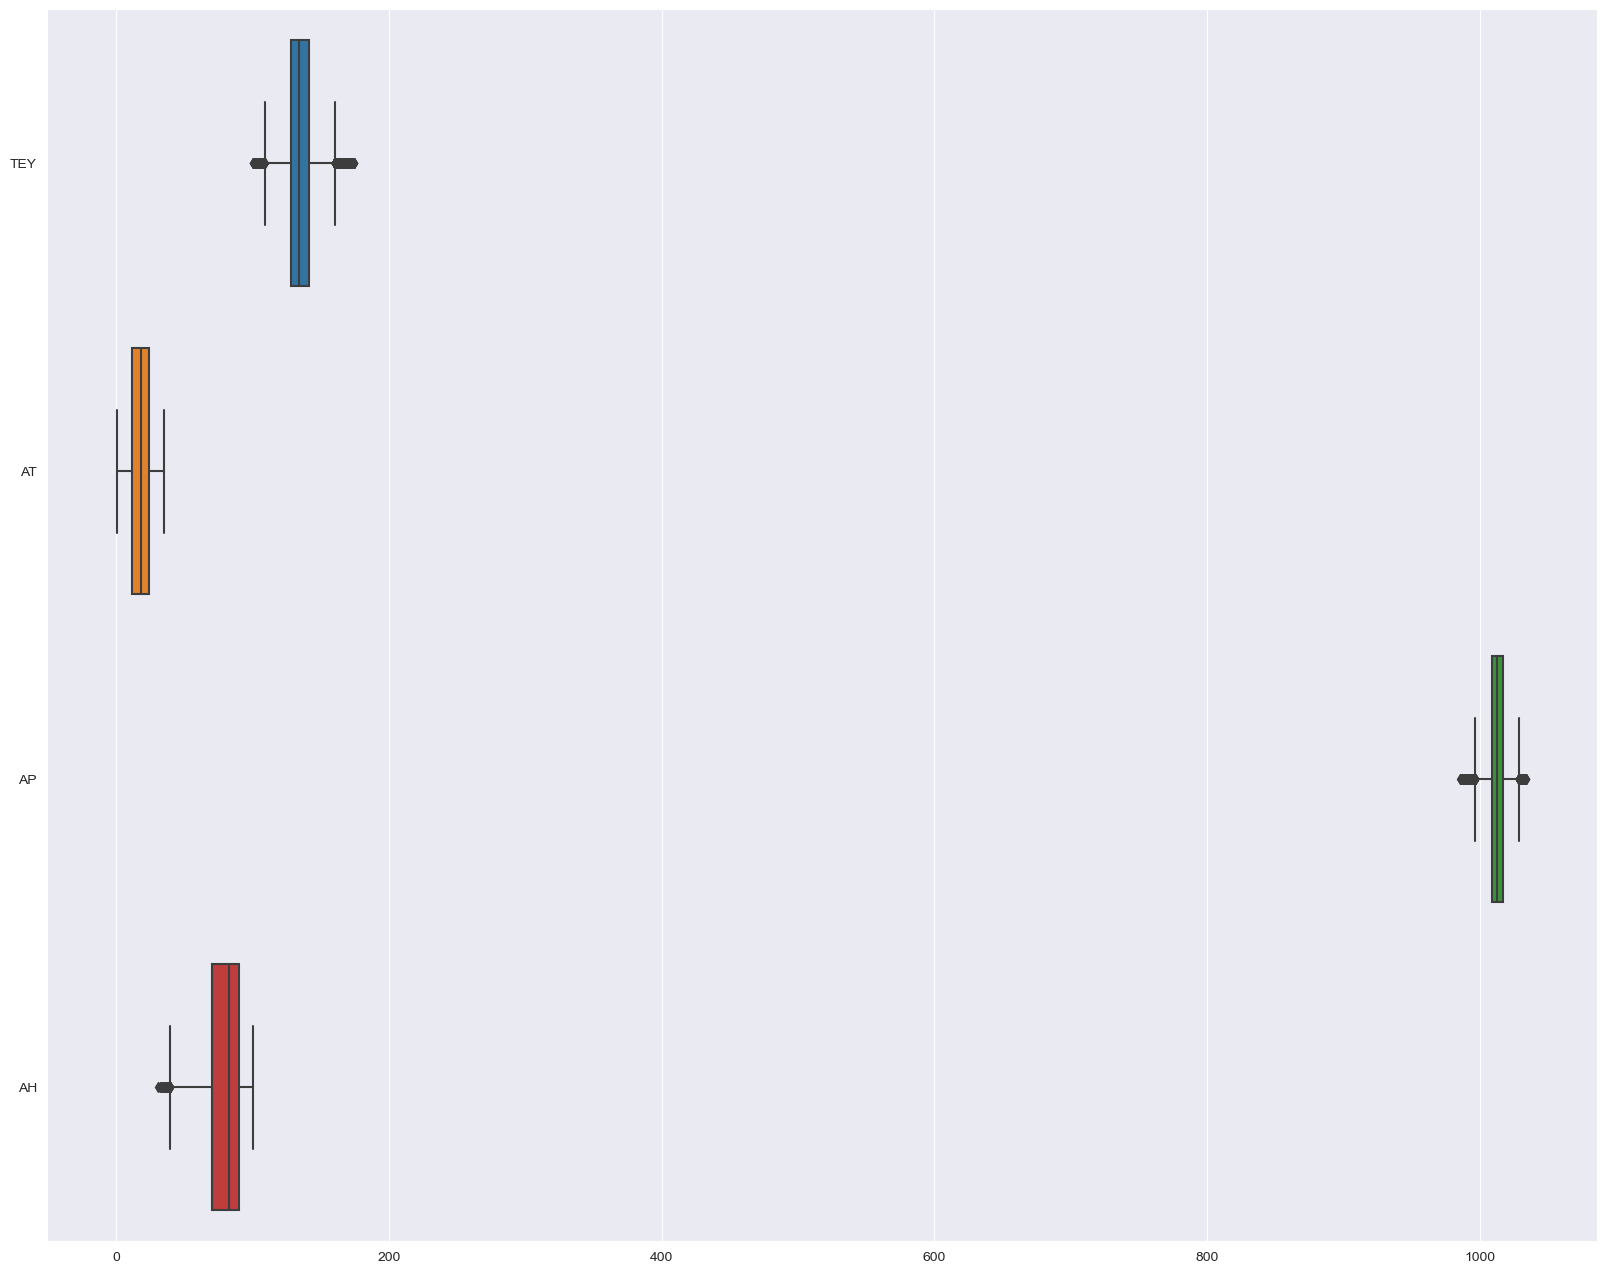

In [19]:
# Outliers:

plt.figure(figsize=(20,16))
sns.boxplot(data=df[numerical_features], orient="h")
plt.show()

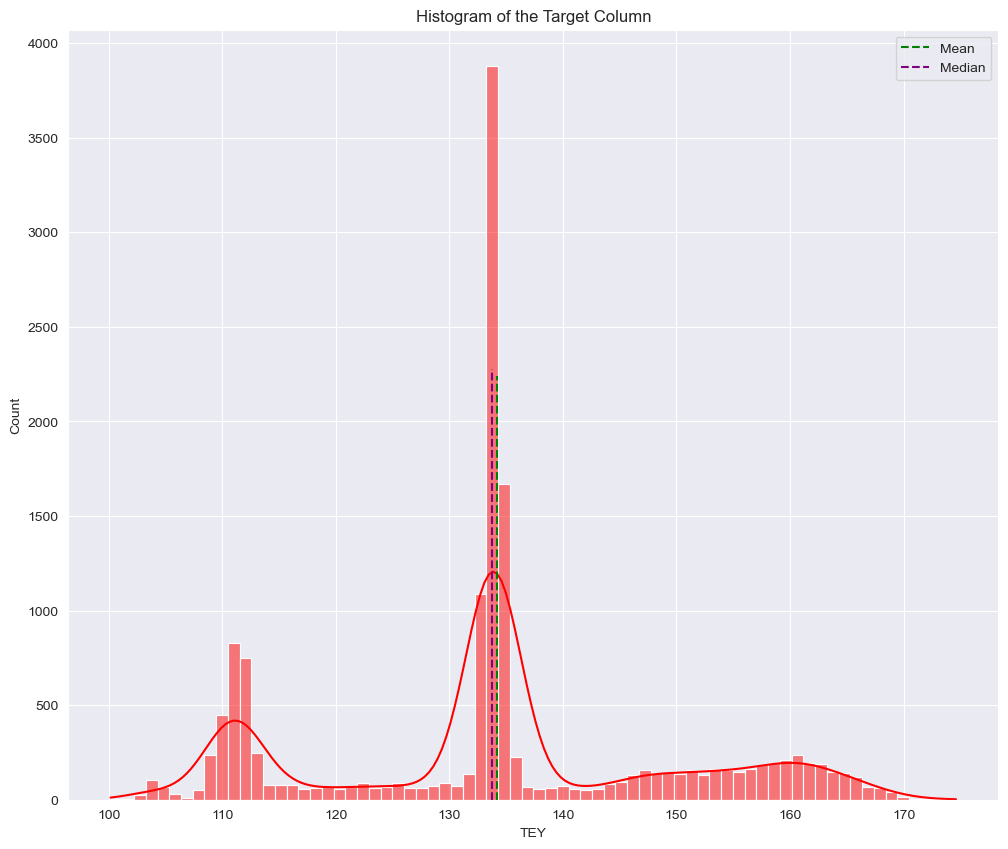

In [20]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=df,x="TEY",color="red",kde=True)
plt.axvline(x=df["TEY"].mean(),ymax=0.55,color="green",linestyle='--',label="Mean")
plt.axvline(x=df["TEY"].median(),ymax=0.56,color="purple",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target Column")
plt.show()

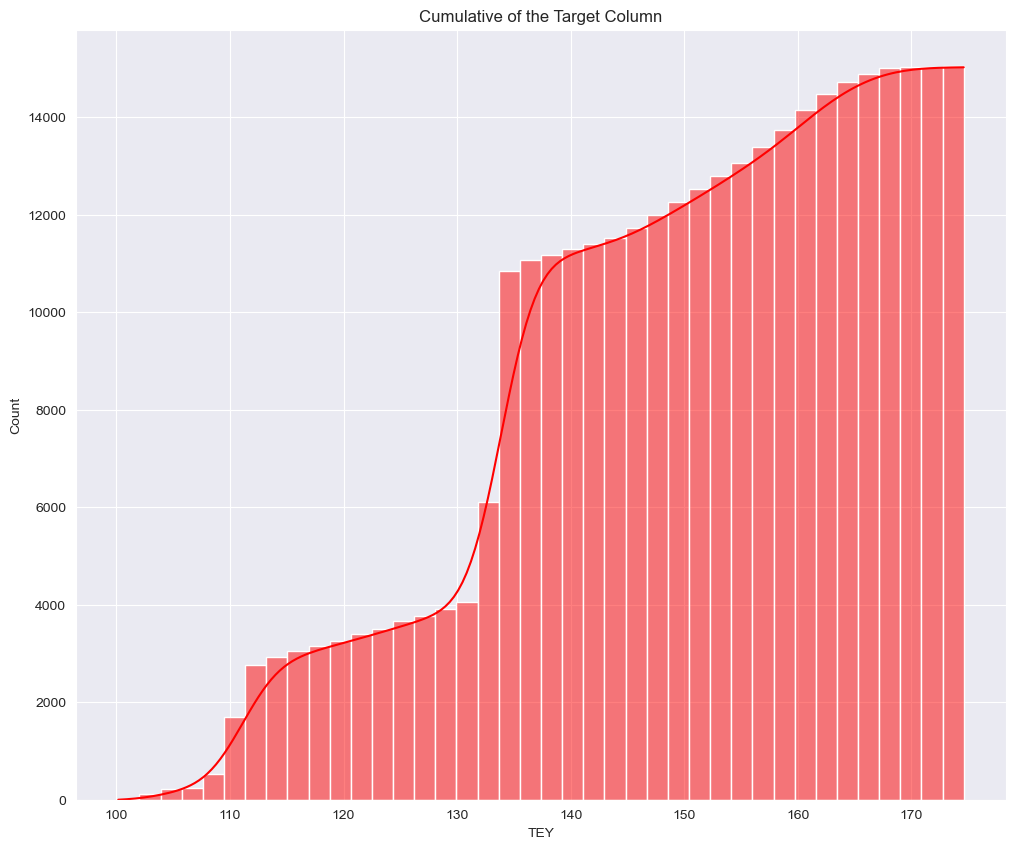

In [21]:
plt.figure(figsize = (12,10))
sns.histplot(df["TEY"],kde=True,bins=40,color="red",cumulative=True)
plt.title("Cumulative of the Target Column")
plt.show()

# Multivariate Analysis

Drawing a pairplot to visually examine the correlation between the features.


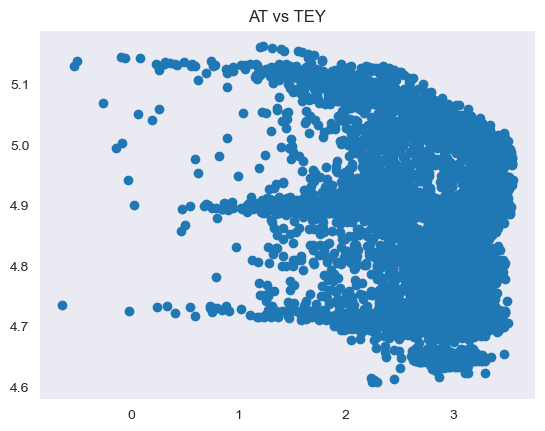

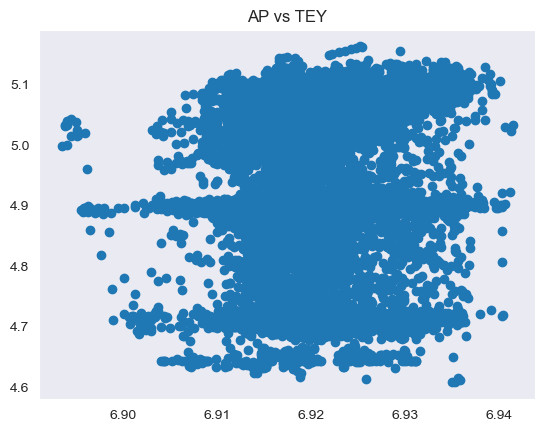

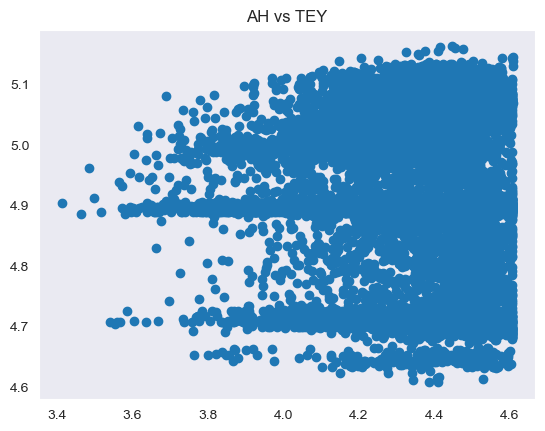

In [22]:
for i in df.columns:
    
    if i!="TEY": 
        plt.scatter(np.log(df[i]), np.log(df['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

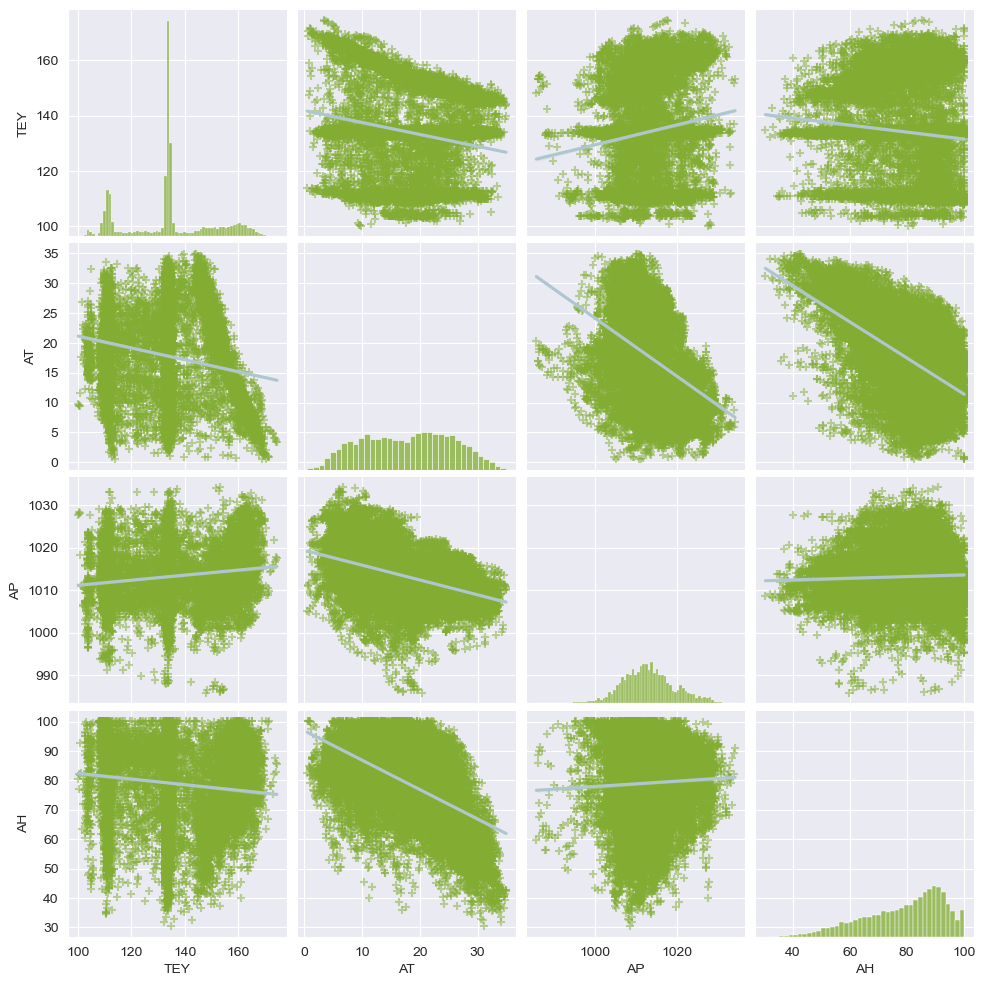

In [23]:
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               
                 diag_kws= {'color': '#82ad32'})
plt.show()

<Figure size 2000x2000 with 0 Axes>

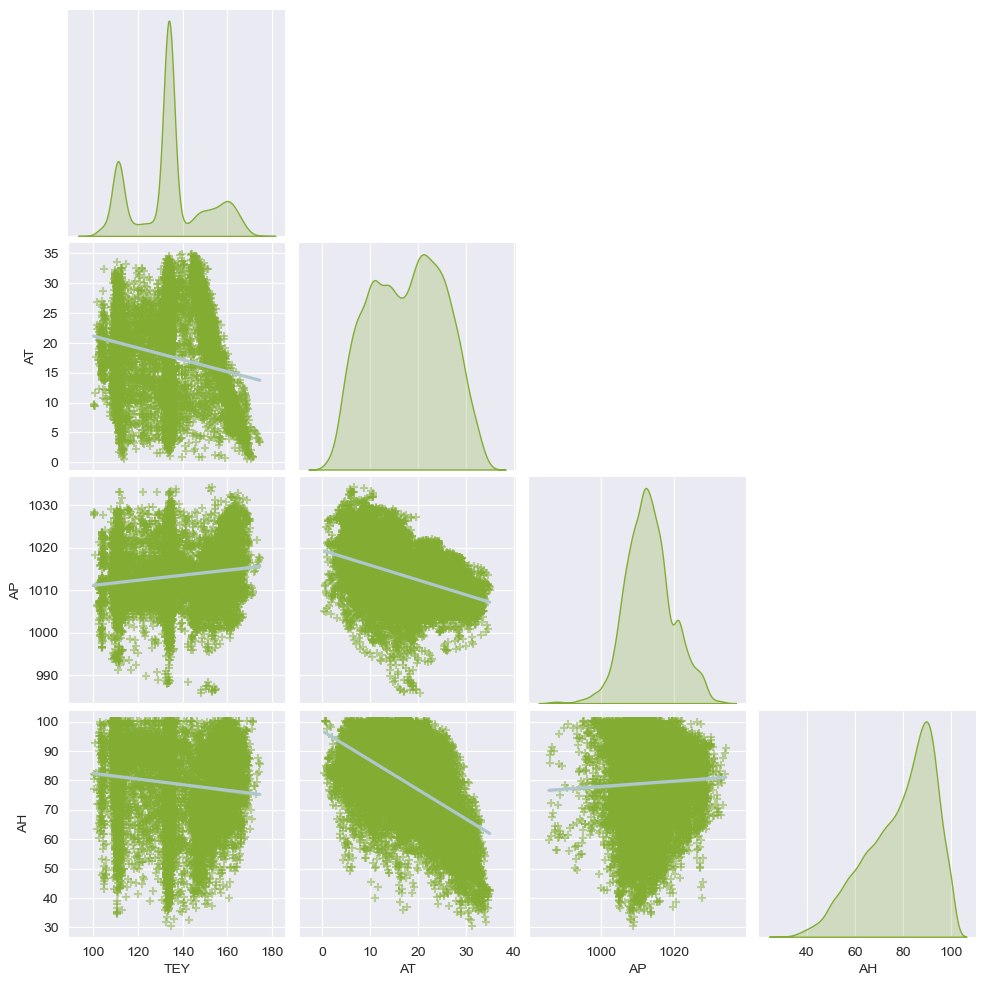

In [24]:
plt.figure(figsize=(20,20))
sns.pairplot(df,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})
plt.show()

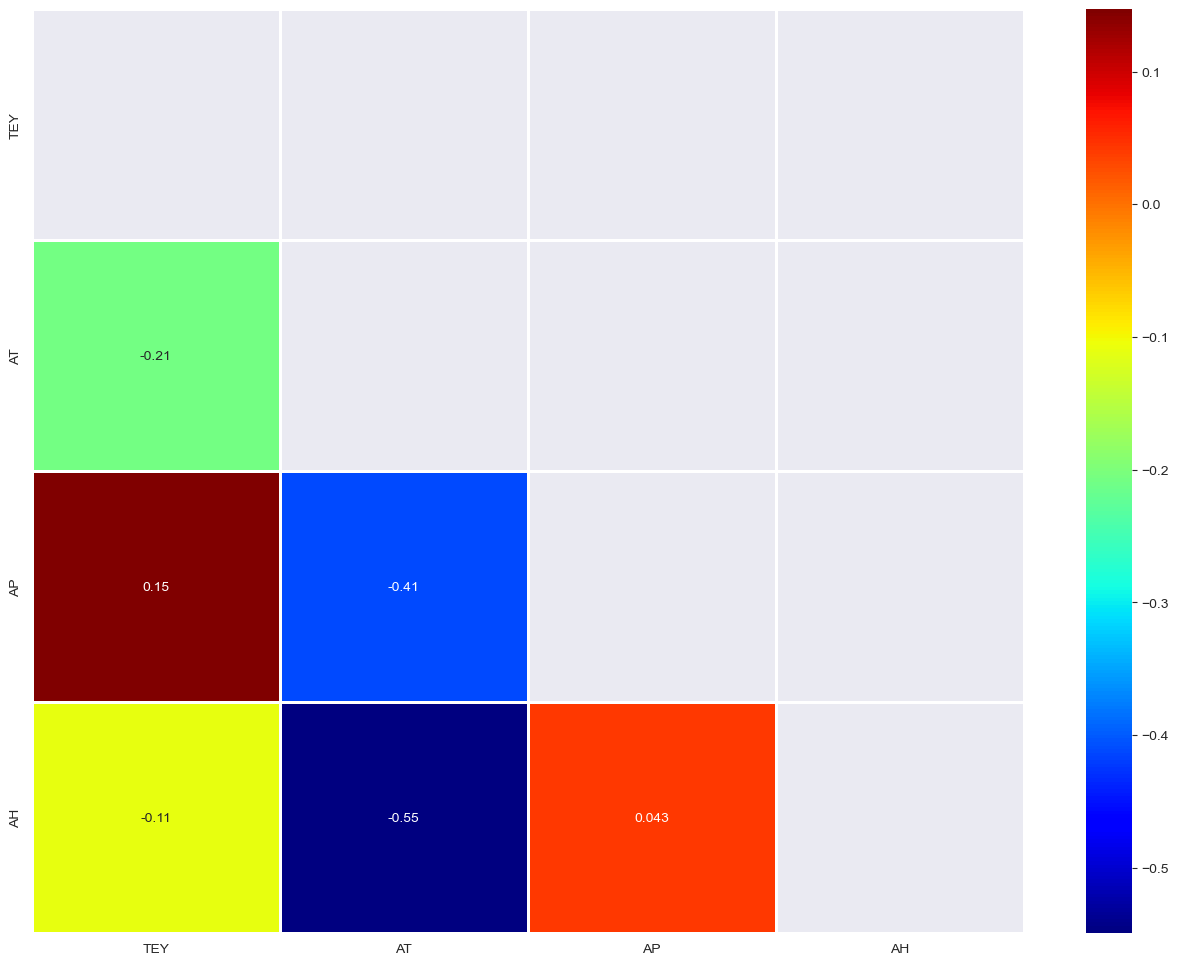

In [25]:
plt.figure(figsize=(16,12))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=df.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)
plt.show()

In [26]:
x = df.drop('TEY', axis=1)
y = df[["TEY"]]

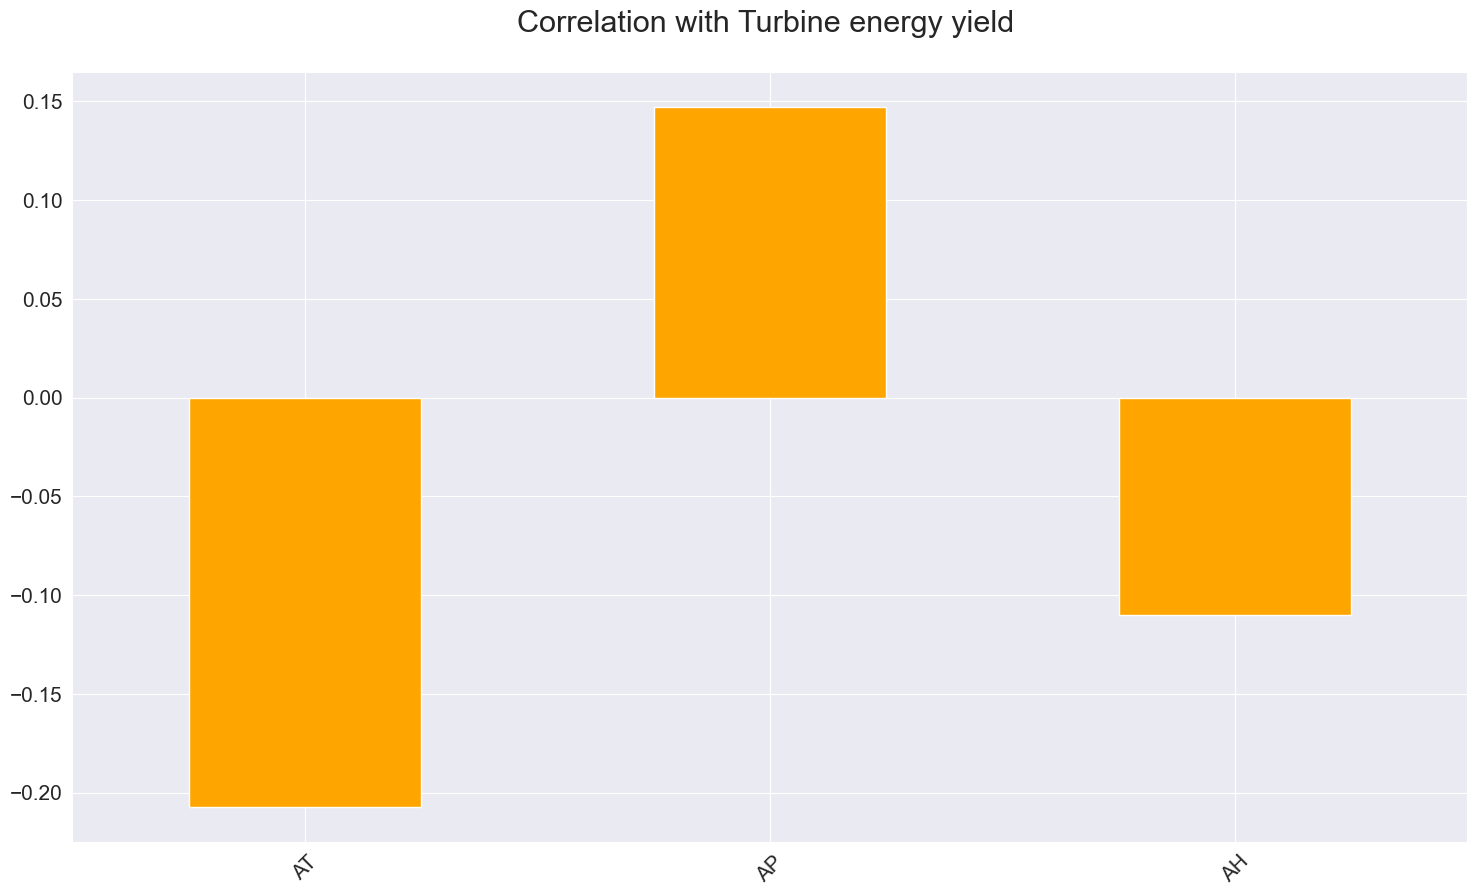

In [27]:
data_2 = df.copy()

correlations = data_2.corrwith(df.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.show()

# Hyperparameter Tuning

In [28]:
seed = 7
np.random.seed(seed)
model = Sequential()
model.add(Dense(12, input_dim=3,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(8,  kernel_initializer='uniform', activation='relu'))
model.add(Dense(1,  kernel_initializer='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history= model.fit(x, y,validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 2s 2ms/step - loss: -4298309.0000 - accuracy: 0.0000e+00 - val_loss: -16621962.0000 - val_accuracy: 0.0000e+00
Epoch 2/150
1008/1008 [==============================] - 2s 2ms/step - loss: -57576700.0000 - accuracy: 0.0000e+00 - val_loss: -112954232.0000 - val_accuracy: 0.0000e+00
Epoch 3/150
1008/1008 [==============================] - 2s 2ms/step - loss: -213013344.0000 - accuracy: 0.0000e+00 - val_loss: -323783456.0000 - val_accuracy: 0.0000e+00
Epoch 4/150
1008/1008 [==============================] - 2s 2ms/step - loss: -495311456.0000 - accuracy: 0.0000e+00 - val_loss: -666462656.0000 - val_accuracy: 0.0000e+00
Epoch 5/150
1008/1008 [==============================] - 2s 2ms/step - loss: -920197120.0000 - accuracy: 0.0000e+00 - val_loss: -1155320832.0000 - val_accuracy: 0.0000e+00
Epoch 6/150
1008/1008 [==============================] - 2s 2ms/step - loss: -1501651840.0000 - accuracy: 0.0000e+00 - val_loss: -1804008192.0000 - 

1008/1008 [==============================] - 2s 2ms/step - loss: -344864456704.0000 - accuracy: 0.0000e+00 - val_loss: -346421198848.0000 - val_accuracy: 0.0000e+00
Epoch 48/150
1008/1008 [==============================] - 2s 2ms/step - loss: -365431357440.0000 - accuracy: 0.0000e+00 - val_loss: -366862499840.0000 - val_accuracy: 0.0000e+00
Epoch 49/150
1008/1008 [==============================] - 2s 2ms/step - loss: -386779807744.0000 - accuracy: 0.0000e+00 - val_loss: -388080533504.0000 - val_accuracy: 0.0000e+00
Epoch 50/150
1008/1008 [==============================] - 2s 2ms/step - loss: -408939397120.0000 - accuracy: 0.0000e+00 - val_loss: -410102661120.0000 - val_accuracy: 0.0000e+00
Epoch 51/150
1008/1008 [==============================] - 2s 2ms/step - loss: -431908159488.0000 - accuracy: 0.0000e+00 - val_loss: -432912924672.0000 - val_accuracy: 0.0000e+00
Epoch 52/150
1008/1008 [==============================] - 2s 2ms/step - loss: -455701757952.0000 - accuracy: 0.0000e+00 - v

Epoch 93/150
1008/1008 [==============================] - 2s 2ms/step - loss: -2319109586944.0000 - accuracy: 0.0000e+00 - val_loss: -2297435258880.0000 - val_accuracy: 0.0000e+00
Epoch 94/150
1008/1008 [==============================] - 2s 2ms/step - loss: -2390423764992.0000 - accuracy: 0.0000e+00 - val_loss: -2367722356736.0000 - val_accuracy: 0.0000e+00
Epoch 95/150
1008/1008 [==============================] - 1s 1ms/step - loss: -2463182880768.0000 - accuracy: 0.0000e+00 - val_loss: -2439432110080.0000 - val_accuracy: 0.0000e+00
Epoch 96/150
1008/1008 [==============================] - 1s 1ms/step - loss: -2537413410816.0000 - accuracy: 0.0000e+00 - val_loss: -2512559800320.0000 - val_accuracy: 0.0000e+00
Epoch 97/150
1008/1008 [==============================] - 1s 1ms/step - loss: -2613093072896.0000 - accuracy: 0.0000e+00 - val_loss: -2587118010368.0000 - val_accuracy: 0.0000e+00
Epoch 98/150
1008/1008 [==============================] - 1s 1ms/step - loss: -2690271412224.0000 - 

1008/1008 [==============================] - 2s 2ms/step - loss: -7145969418240.0000 - accuracy: 0.0000e+00 - val_loss: -7045316608000.0000 - val_accuracy: 0.0000e+00
Epoch 139/150
1008/1008 [==============================] - 2s 2ms/step - loss: -7295602786304.0000 - accuracy: 0.0000e+00 - val_loss: -7192284495872.0000 - val_accuracy: 0.0000e+00
Epoch 140/150
1008/1008 [==============================] - 2s 2ms/step - loss: -7447327539200.0000 - accuracy: 0.0000e+00 - val_loss: -7341396197376.0000 - val_accuracy: 0.0000e+00
Epoch 141/150
1008/1008 [==============================] - 2s 2ms/step - loss: -7601126899712.0000 - accuracy: 0.0000e+00 - val_loss: -7492418404352.0000 - val_accuracy: 0.0000e+00
Epoch 142/150
1008/1008 [==============================] - 2s 2ms/step - loss: -7756918030336.0000 - accuracy: 0.0000e+00 - val_loss: -7645477994496.0000 - val_accuracy: 0.0000e+00
Epoch 143/150
1008/1008 [==============================] - 2s 2ms/step - loss: -7914903306240.0000 - accuracy

In [29]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: -9094622609408.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

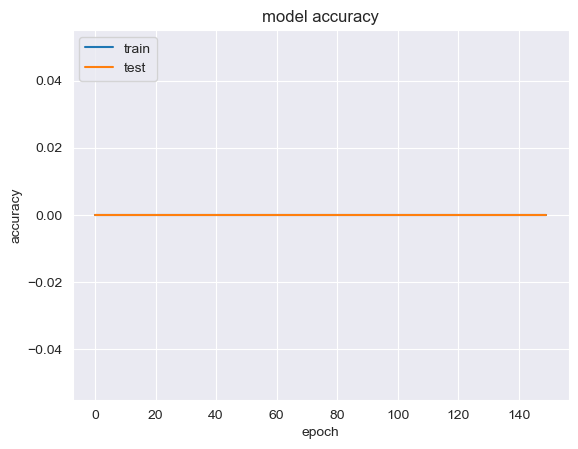

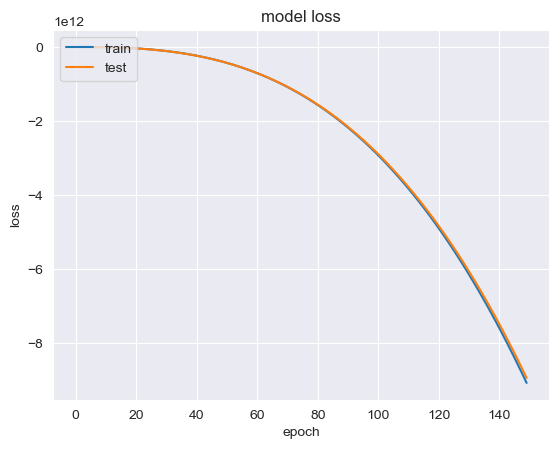

In [31]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
a = StandardScaler()
a.fit(x)
X_standardized = a.transform(x)
pd.DataFrame(X_standardized).describe()

,0,1,2
count,1.503900e+04,1.503900e+04,1.503900e+04
mean,-2.320107e-16,-1.925280e-14,1.844983e-16
std,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01
max,2.266234e+00,3.275970e+00,1.528011e+00


In [33]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))\
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [34]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  13.3s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  13.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  13.0s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  13.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  13.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [35]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 50}
0.0,0.0 with: {'batch_size': 10, 'epochs': 100}
0.0,0.0 with: {'batch_size': 20, 'epochs': 10}
0.0,0.0 with: {'batch_size': 20, 'epochs': 50}
0.0,0.0 with: {'batch_size': 20, 'epochs': 100}
0.0,0.0 with: {'batch_size': 40, 'epochs': 10}
0.0,0.0 with: {'batch_size': 40, 'epochs': 50}
0.0,0.0 with: {'batch_size': 40, 'epochs': 100}


In [36]:
def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 3,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [37]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   3.0s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   3.0s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   3.0s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   2.9s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.000 total time=   2.9s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [38]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [39]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 3,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [40]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   4.2s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   4.0s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   4.0s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   4.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.000 total time=   4.1s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

[CV 3/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   4.2s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   3.9s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform;, score=0.000 total time=   3.9s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   3.9s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   3.9s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END activation_function=linear, init=normal;, score=0.000 total time=   3.9s
[CV 4/5; 11/12] START activation_f

In [41]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 3,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [42]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   3.9s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   3.9s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   3.8s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   3.8s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=2;, score=0.000 total time=   3.8s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=4;,

In [43]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 8}


In [44]:
from sklearn.metrics import classification_report, accuracy_score
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(8,input_dim = 3,kernel_initializer = 'normal',activation = 'linear'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [45]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 100)

# Fitting the model

model.fit(X_standardized,y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(y_predict.round(),y.round()))

470/470 [==============================] - 1s 931us/step
0.00013298756566261055
